In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd "/content/drive/Othercomputers/My PC/cs7643-project"

/content/drive/Othercomputers/My PC/cs7643-project


In [20]:
from visualizers import FoolingImage
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as T
import PIL
import torch
import random
import os
from PIL import Image


In [2]:
 posesToConsider = {
     'Boat_Pose_or_Paripurna_Navasana_',
     'Bridge_Pose_or_Setu_Bandha_Sarvangasana_',
     'Chair_Pose_or_Utkatasana_',
     'Cobra_Pose_or_Bhujangasana_',
     'Extended_Revolved_Triangle_Pose_or_Utthita_Trikonasana_',
     'Lord_of_the_Dance_Pose_or_Natarajasana_',
     'Seated_Forward_Bend_pose_or_Paschimottanasana_',
     'Supta_Baddha_Konasana_',
     'Supta_Virasana_Vajrasana'}

    

In [23]:
# these were the means/std from the assignment, might want to adjust
MEANS = np.array([0.485, 0.456, 0.406], dtype=np.float32)
STDDEVS = np.array([0.229, 0.224, 0.225], dtype=np.float32)


def preprocess(img, size=224):
    transform = T.Compose([
        T.Resize(size),
        T.ToTensor(),
        T.Normalize(mean=MEANS.tolist(),
                    std=STDDEVS.tolist()),
        T.Lambda(lambda x: x[None]),
    ])
    return transform(img)


def deprocess(img, should_rescale=True):
    transform = T.Compose([
        T.Lambda(lambda x: x[0]),
        T.Normalize(mean=[0, 0, 0], std=(1.0 / STDDEVS).tolist()),
        T.Normalize(mean=(-MEANS).tolist(), std=[1, 1, 1]),
        T.Lambda(rescale) if should_rescale else T.Lambda(lambda x: x),
        T.ToPILImage(),
    ])
    return transform(img)

def rescale(x):
    low, high = x.min(), x.max()
    x_rescaled = (x - low) / (high - low)
    return x_rescaled

def get_image_and_target(imagePath,targetPath):
    img = PIL.Image.open(imagePath)
    img_target = PIL.Image.open(targetPath)
    return (img,img_target)

def get_random_file_from_other_class(actual,dirPath):
    sample = actual
    while True:
        sample = random.sample(posesToConsider,1)[0]
        if sample != actual:
            break
    p = os.path.join(dirPath,sample)
    rand_image = random.choice(os.listdir(p))
    return (os.path.join(p,rand_image),sample)



In [18]:
get_random_file_from_other_class('Boat_Pose_or_Paripurna_Navasana_',"/content/drive/Othercomputers/My PC/cs7643-project/Images")

'/content/drive/Othercomputers/My PC/cs7643-project/Images/Cobra_Pose_or_Bhujangasana_/3_69.jpg'

In [6]:
f = open("Yoga-82/yoga_test.txt");
test_lines = f.readlines();
f.close();

In [7]:
d = {}
pose_to_class = {}
for entry in test_lines:
    base_pose, class6, class20, class82 = entry.split(",")
    if int(class82) in d:
        pass
    else:
        d[int(class82)] = base_pose.split("/")[0]
        pose_to_class[base_pose.split("/")[0]] = int(class82)

    

In [19]:
model = torch.load('./models/model_state/best_model.pt', map_location=torch.device('cpu'))
model_resnet = torch.load('./models/model_state/resnet/best_model.pt', map_location=torch.device('cpu'))

In [30]:
import os
import json
import pandas as pd

count = {k:0 for k in posesToConsider}
root = "/content/drive/Othercomputers/My PC/cs7643-project/Images/"
for subdir,dir,files in os.walk(root):
    poseName = subdir.split(root,1)[1]
    if poseName not in posesToConsider:
        continue    
    for fileName in files:
        #only look for json files
        if fileName.endswith(".jpg"):
            if count[poseName] >= 10:
                continue
            p = os.path.join(root,subdir,fileName)
            other_p,target_c = get_random_file_from_other_class(poseName,root)
            try:
                img,target_img = get_image_and_target(p,other_p)
            
                # create fooling image
                X_tensor = preprocess(img)
                fi = FoolingImage()

                target_y = pose_to_class[target_c]
                X_fooling = fi.make_fooling_image(X_tensor, target_y, model, min_iter = 7)

                X_fooling_np = deprocess(X_fooling.clone())
                X_fooling_np = np.asarray(X_fooling_np).astype(np.uint8)

                #save fooling image
                im = Image.fromarray(X_fooling_np)
                filePath = f"./fooling_images/images/{poseName}/{fileName}"
                directory = os.path.dirname(filePath)
                if not os.path.exists(directory):
                    os.makedirs(directory)

                im.save(filePath)
            except:
                continue

            count[poseName] +=1

iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 9
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8
iteration fooled: 8


In [ ]:

X_tensor = preprocess(img)
fi = FoolingImage()
X_fooling = fi.make_fooling_image(X_tensor, target_y, model, min_iter = 7)

iteration fooled: 8


In [ ]:

scores = model(Variable(X_fooling))
score_orig = model(Variable(X_tensor))
predicted_class = int(scores.data.max(1)[1][0])
predicted_class_orig = int(score_orig.data.max(1)[1][0])


scores_resnet = model_resnet(Variable(X_fooling))
score_orig_resnet = model_resnet(Variable(X_tensor))
predicted_class_resnet = int(scores_resnet.data.max(1)[1][0])
predicted_class_orig_resnet = int(score_orig_resnet.data.max(1)[1][0])


X_fooling_np = deprocess(X_fooling.clone())
X_fooling_np = np.asarray(X_fooling_np).astype(np.uint8)


print("Densenet predicted class and fooled class:", predicted_class_orig, predicted_class)
print("Resnet predicted class and fooled class:", predicted_class_orig_resnet, predicted_class_resnet)


Densenet predicted class and fooled class: 22 7
Resnet predicted class and fooled class: 22 22


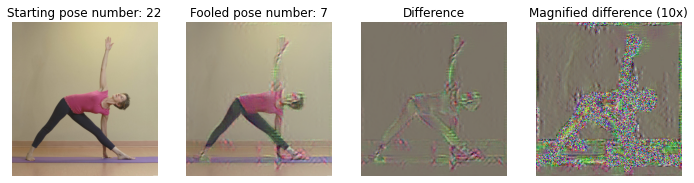

In [ ]:
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title("Starting pose number: " + str(base_class))
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(X_fooling_np)
plt.title("Fooled pose number: " + str(predicted_class))
plt.axis('off')

plt.subplot(1, 4, 3)
X_pre = preprocess(img)
diff = np.asarray(deprocess(X_fooling - X_pre, should_rescale=False))
plt.imshow(diff)
plt.title('Difference')
plt.axis('off')

plt.subplot(1, 4, 4)
diff = np.asarray(deprocess(10 * (X_fooling - X_pre), should_rescale=False))
plt.imshow(diff)
plt.title('Magnified difference (10x)')
plt.axis('off')

plt.gcf().set_size_inches(12, 5)
plt.savefig('./visualization/fooling_image.png')
plt.show()

In [ ]:
import numpy as np
import os
from PIL import Image


im = Image.fromarray(X_fooling_np)
poseName = "Extended_Revolved_Triangle_Pose_or_Utthita_Trikonasana_"
poseFile = "1_369.jpg" 
filePath = f"./fooling_images/images/{poseName}/{poseFile}"
directory = os.path.dirname(filePath)
if not os.path.exists(directory):
    os.makedirs(directory)

im.save(filePath)